## Key observations:
* must take log1p of count to eliminate skewness
* more varaibility in casual users versus registered users for bike rental 
* season/weather dont contribute to bike rental for registered or casual users
* humidity and windspeed dont fluctuate with bike rental count 
* temperature fluctuates with bike rental count 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split

In [3]:
bikes=pd.read_csv('train.csv', index_col=0, parse_dates=True)

In [4]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
def cleanerX(X1):
    '''
    Add 4 columns into data frame: month, day, hour and name of day 
    '''
    X=X1.copy()
    X['month']=X.index.month
    X['day']=X.index.weekday
    X['hour']=X.index.hour
    X['dayName']=X.index.day_name()
    return X

In [6]:
bikes_clean=cleanerX(bikes)

In [7]:
bikes_clean.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayName
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4,Saturday


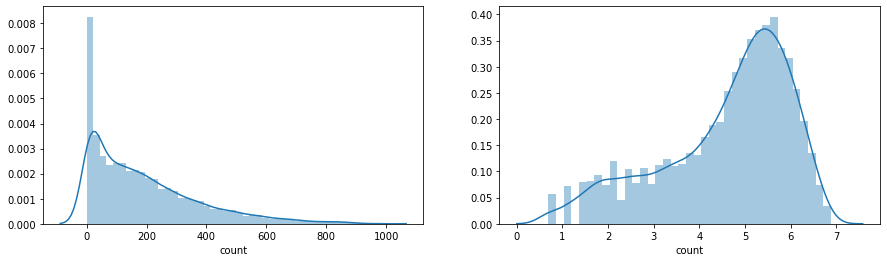

In [8]:
fig, g=plt.subplots(1,2, figsize=(15,4))
sns.distplot(bikes_clean['count'], ax=g[0])
sns.distplot(np.log1p(bikes_clean['count']), ax=g[1])

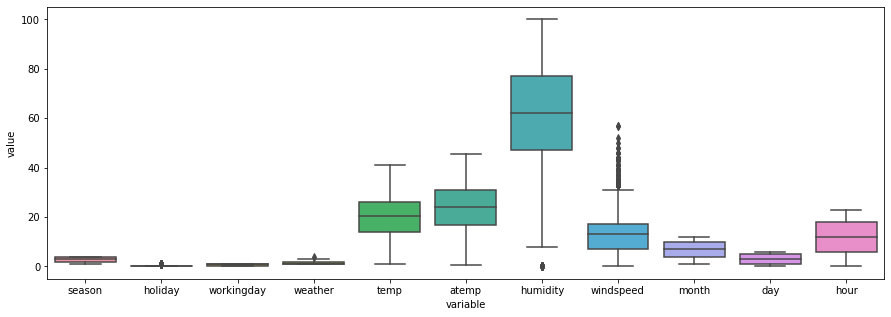

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='value', 
            data=pd.melt(bikes_clean.drop(['count', 'casual', 'registered', 'dayName'], axis=1)))

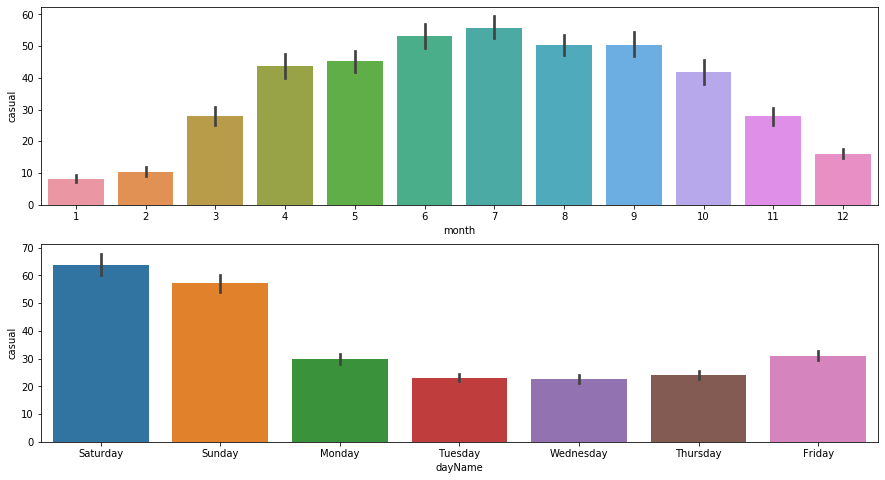

In [10]:
fig, g=plt.subplots(2,1, figsize=(15,8))
sns.barplot(x='month', y='casual', data=bikes_clean, ax=g[0])
sns.barplot(x='dayName', y='casual', data=bikes_clean, ax=g[1])

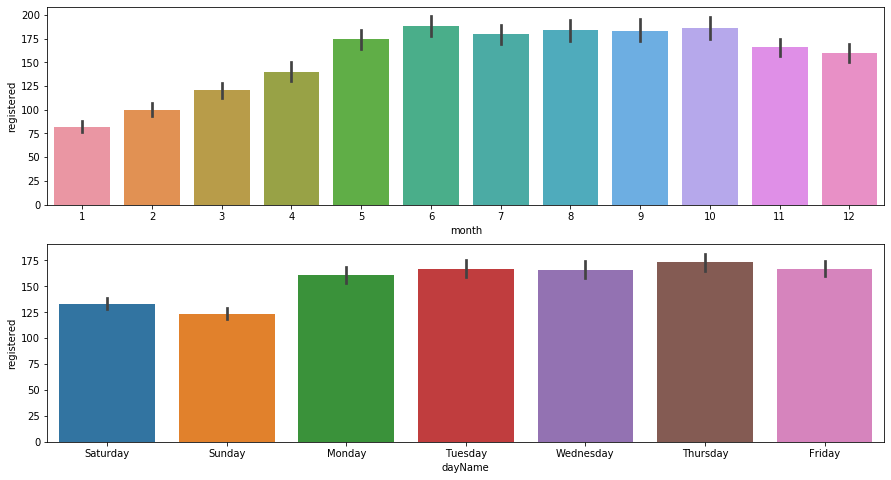

In [11]:
fig, g=plt.subplots(2,1, figsize=(15,8))
sns.barplot(x='month', y='registered', data=bikes_clean, ax=g[0])
sns.barplot(x='dayName', y='registered', data=bikes_clean, ax=g[1])

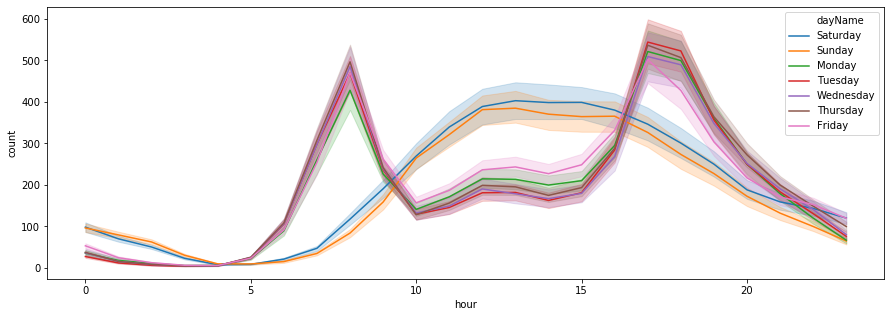

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x='hour', y='count', data=bikes_clean, hue='dayName').figure.savefig('user_diff.png')

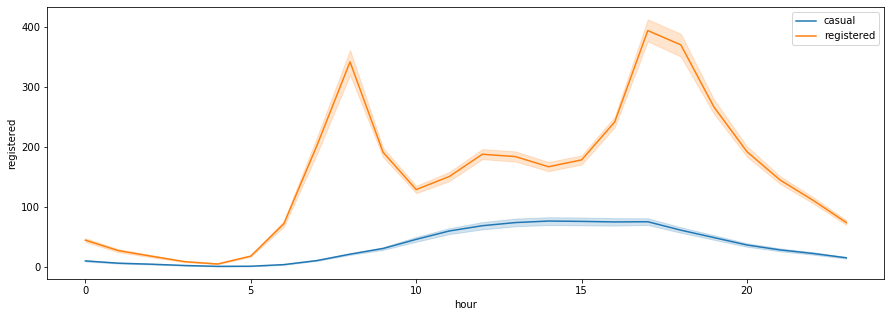

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='hour', y='casual', data=bikes_clean, label='casual')
sns.lineplot(x='hour', y='registered', data=bikes_clean, label='registered')

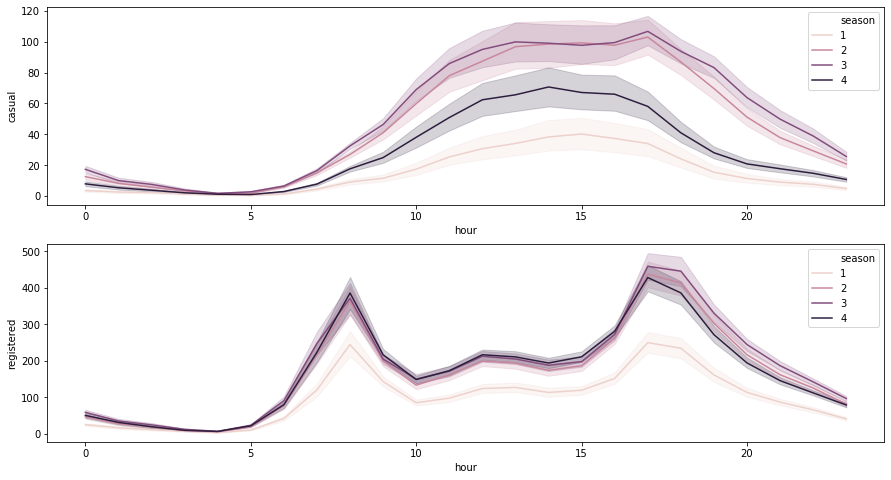

In [25]:
fig, g=plt.subplots(2,1, figsize=(15,8))
sns.lineplot(x='hour', y='casual', data=bikes_clean, hue='season', ax=g[0])
sns.lineplot(x='hour', y='registered', data=bikes_clean, hue='season', ax=g[1])

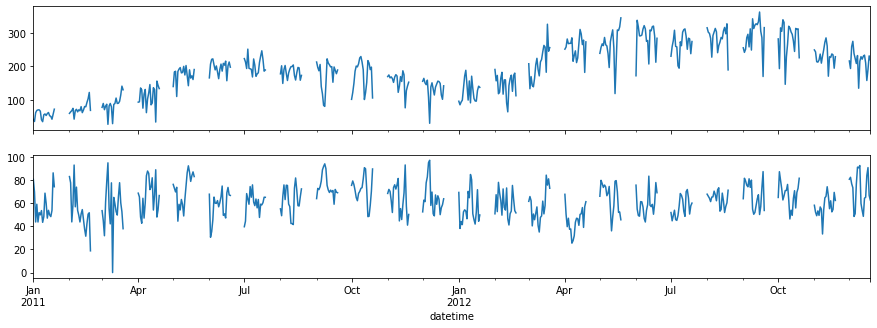

In [26]:
fig, g=plt.subplots(2,1,figsize=(15,5), sharex=True)
bikes_clean['count'].resample('1D').mean().plot(ax=g[0])
bikes_clean['humidity'].resample('1D').mean().plot(ax=g[1])

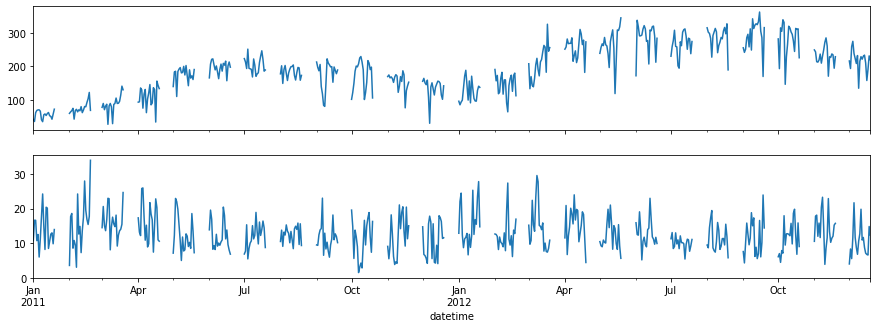

In [27]:
fig, g=plt.subplots(2,1,figsize=(15,5), sharex=True)
bikes_clean['count'].resample('1D').mean().plot(ax=g[0])
bikes_clean['windspeed'].resample('1D').mean().plot(ax=g[1])

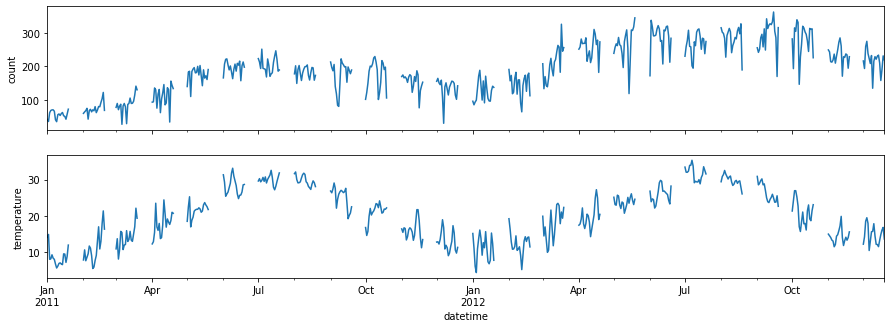

In [19]:
fig, g=plt.subplots(2,1,figsize=(15,5), sharex=True)
bikes_clean['count'].resample('1D').mean().plot(ax=g[0])
g[0].set_ylabel('count')
bikes_clean['temp'].resample('1D').mean().plot(ax=g[1])
g[1].set_ylabel('temperature')
fig.savefig('temp_count_fluctuation.png')

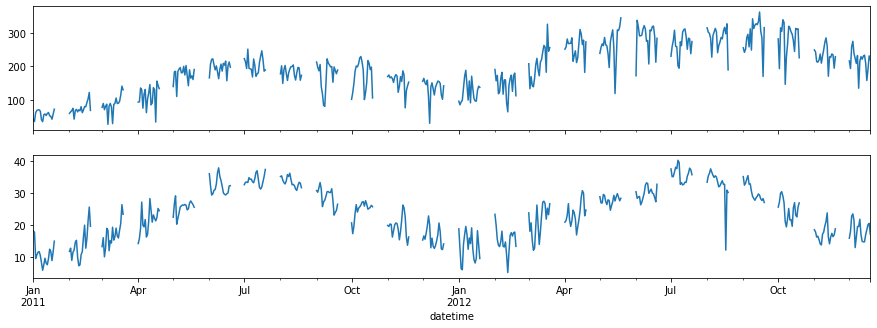

In [29]:
fig, g=plt.subplots(2,1,figsize=(15,5), sharex=True)
bikes_clean['count'].resample('1D').mean().plot(ax=g[0])
bikes_clean['atemp'].resample('1D').mean().plot(ax=g[1])